In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
import statistics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

import warnings

In [2]:
df = pd.read_csv('song_data.csv')
df.head()
df.shape
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

# Data Exploration

In [3]:
# missing value check
df.isnull().sum()
df=df.drop_duplicates(subset=['song_name','song_popularity'])

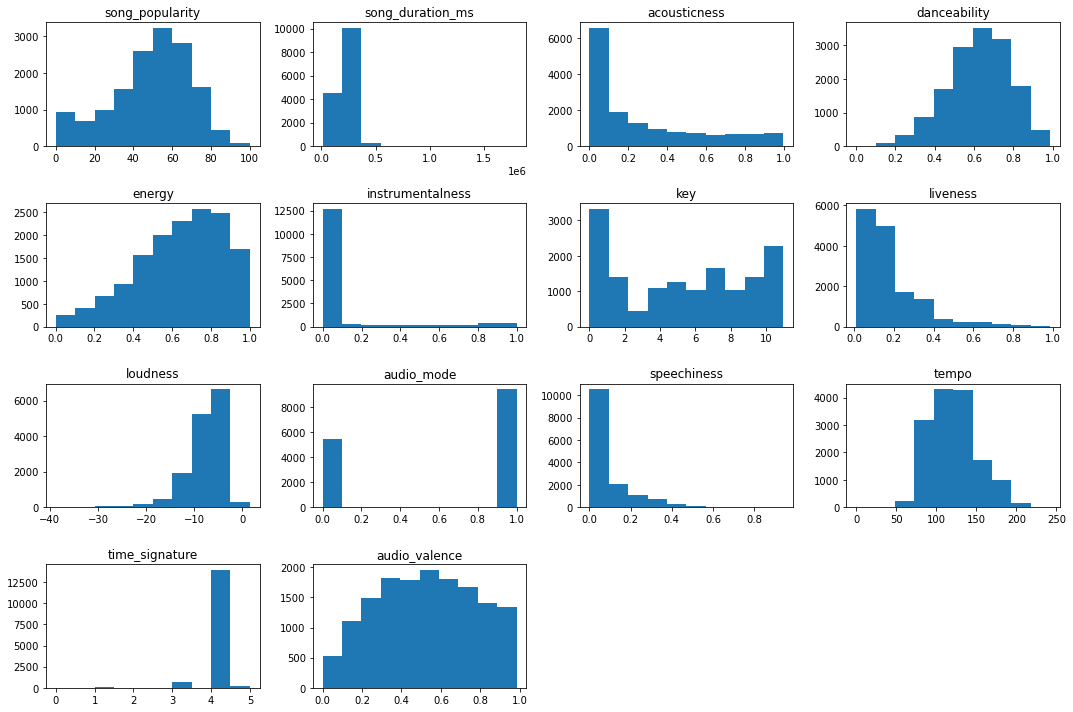

In [4]:
df.hist(grid=False, figsize=(15,10))
plt.tight_layout()
plt.show()

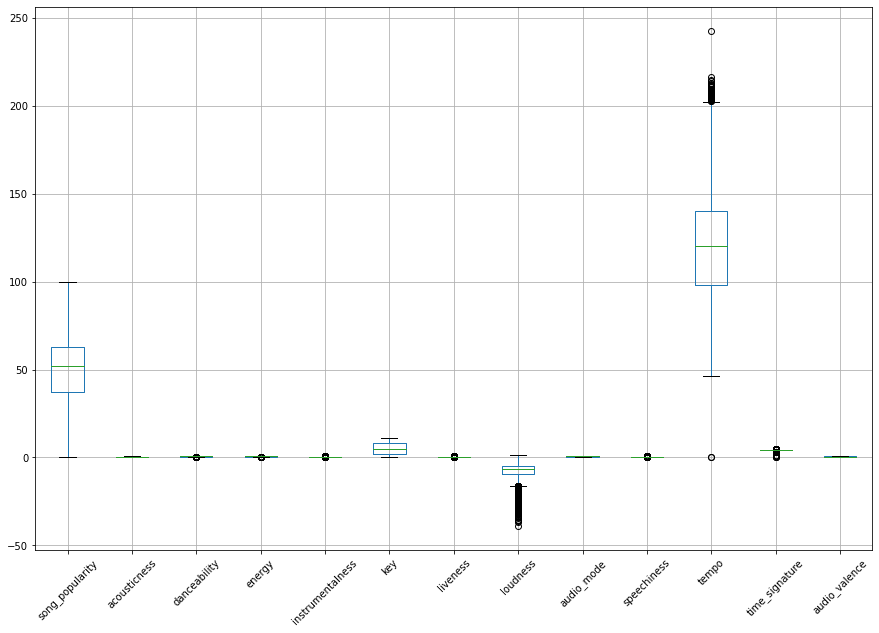

In [5]:
df.drop('song_duration_ms', axis=1).boxplot(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

In [6]:
warnings.filterwarnings("ignore", category=FutureWarning)
for variable in df.columns.drop(['time_signature', 'song_name', 'audio_mode', 'key']):
    data = df[variable]
    mid = np.median(data)
    percentile_10 = np.quantile(data, 0.1)
    percentile_90 = np.quantile(data, 0.9)
    outlier_low = data < percentile_10
    outlier_high = data > percentile_90
    df[variable][outlier_low] = percentile_10
    df[variable][outlier_high] = percentile_90

/var/folders/5t/drh_ys0122sf_3q7npyxb3mh0000gn/T/ipykernel_23705/1830145181.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable][outlier_high] = percentile_90
/var/folders/5t/drh_ys0122sf_3q7npyxb3mh0000gn/T/ipykernel_23705/1830145181.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable][outlier_high] = percentile_90
/var/folders/5t/drh_ys0122sf_3q7npyxb3mh0000gn/T/ipykernel_23705/1830145181.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

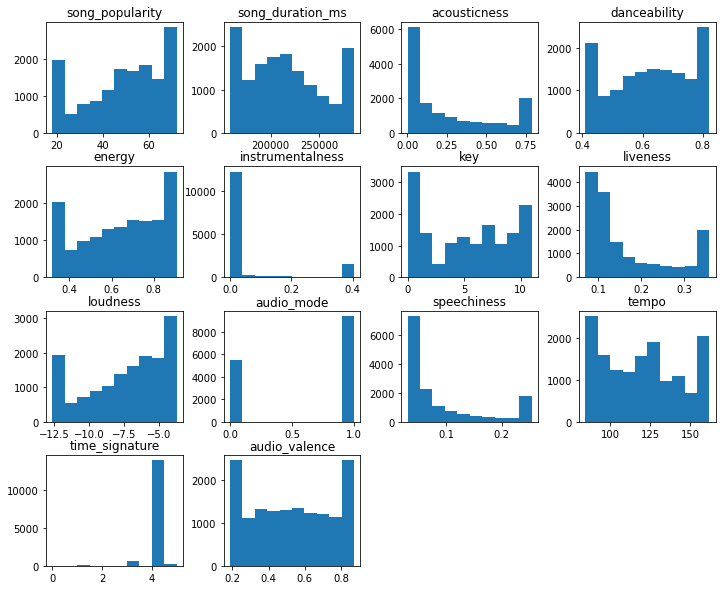

In [7]:
df.hist(grid=False, figsize=(12, 10))
plt.show()

# Inference

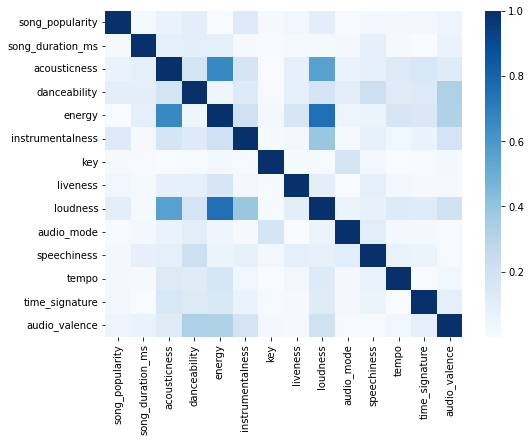

In [8]:
df_inf = pd.read_csv('song_data.csv')
df_inf.head()
df_inf.shape
cor = df_inf.corr().abs()
plt.figure(figsize=(8, 6))
sns.heatmap(cor, cmap='Blues')
plt.show()

In [9]:
df_inf.corr().abs()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,0.018899,0.065181,0.104290,0.001365,0.130907,0.013160,0.038937,0.099442,0.004969,0.021479,0.022672,0.034983,0.052895
song_duration_ms,0.018899,1.000000,0.097882,0.104985,0.092688,0.015188,0.004615,0.016086,0.016469,0.026328,0.083447,0.012791,0.000264,0.063421
acousticness,0.065181,0.097882,1.000000,0.182500,0.662639,0.173098,0.002025,0.082537,0.557744,0.064100,0.093574,0.136421,0.157177,0.121670
danceability,0.104290,0.104985,0.182500,1.000000,0.044373,0.130483,0.007723,0.090694,0.177639,0.106539,0.213728,0.121286,0.136391,0.332014
energy,0.001365,0.092688,0.662639,0.044373,1.000000,0.205914,0.020416,0.167143,0.755516,0.051605,0.062053,0.162448,0.146265,0.316742
instrumentalness,0.130907,0.015188,0.173098,0.130483,0.205914,1.000000,0.009463,0.032887,0.390248,0.014983,0.081138,0.036934,0.069181,0.178570
key,0.013160,0.004615,0.002025,0.007723,0.020416,0.009463,1.000000,0.008193,0.010452,0.169848,0.033639,0.003239,0.008282,0.025356
liveness,0.038937,0.016086,0.082537,0.090694,0.167143,0.032887,0.008193,1.000000,0.102450,0.001035,0.090845,0.031876,0.013289,0.013789
loudness,0.099442,0.016469,0.557744,0.177639,0.755516,0.390248,0.010452,0.102450,1.000000,0.058506,0.078164,0.129938,0.119241,0.199696
audio_mode,0.004969,0.026328,0.064100,0.106539,0.051605,0.014983,0.169848,0.001035,0.058506,1.000000,0.111627,0.020448,0.024042,0.004558


In [10]:
pnd=df[["song_popularity","danceability"]] #popularity and danceability
popularity_data=df["song_popularity"].values
dance_data=df["danceability"].values
less_d=[]
more_d=[]
median=np.median(dance_data)
for i,j in zip(popularity_data,dance_data):
    if j<median:      
        less_d.append(i)
    else:
        more_d.append(i)

In [11]:
from scipy.stats import kstest
kstest(popularity_data, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [12]:
kstest(dance_data, 'norm')

KstestResult(statistic=0.6590970262276774, pvalue=0.0)

In [13]:
pnd.corr()

,song_popularity,danceability
song_popularity,1.000000,0.045943
danceability,0.045943,1.000000


In [14]:
stats.mannwhitneyu(less_d, more_d, alternative='less')

MannwhitneyuResult(statistic=26484477.5, pvalue=1.0243327648222855e-06)

In [15]:
import math
def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    s = math.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    m1, m2 = np.mean(d1), np.mean(d2)
    return (m1 - m2) / s

In [16]:
effectsize = cohend(less_d,more_d)
effectsize

-0.07565641985786144

In [17]:
from statsmodels.stats.power import TTestIndPower
power = TTestIndPower().power(effect_size=abs(effectsize), nobs1=len(less_d), alpha=0.05, ratio=len(more_d)/len(less_d), df=None, alternative='two-sided')
power

0.9960498564924297

# Model Building

## Multicollinearity Check

In [18]:
df_num = df.drop(['song_name', 'audio_mode', 'song_name', 'song_popularity', 'key'], axis=1)
#sns.pairplot(df_num, plot_kws={"s": 3})

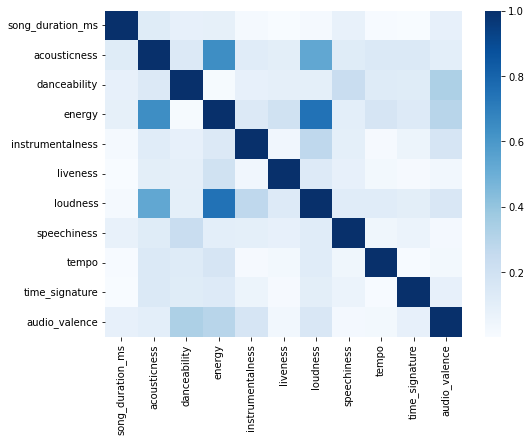

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,audio_valence
song_duration_ms,1.000000,0.120348,0.087371,0.089748,0.018622,0.004107,0.021081,0.077057,0.006961,0.002862,0.085286
acousticness,0.120348,1.000000,0.142689,0.639131,0.116459,0.107793,0.530402,0.120773,0.143306,0.145442,0.101030
danceability,0.087371,0.142689,1.000000,0.011759,0.086590,0.095704,0.098982,0.237822,0.128223,0.121244,0.333061
energy,0.089748,0.639131,0.011759,1.000000,0.142619,0.200062,0.744446,0.103003,0.171713,0.135179,0.296715
instrumentalness,0.018622,0.116459,0.086590,0.142619,1.000000,0.040742,0.275318,0.097429,0.016676,0.060096,0.174125
liveness,0.004107,0.107793,0.095704,0.200062,0.040742,1.000000,0.135065,0.087516,0.029928,0.016138,0.035180
loudness,0.021081,0.530402,0.098982,0.744446,0.275318,0.135065,1.000000,0.118814,0.115879,0.104534,0.155107
speechiness,0.077057,0.120773,0.237822,0.103003,0.097429,0.087516,0.118814,1.000000,0.043975,0.062241,0.024561
tempo,0.006961,0.143306,0.128223,0.171713,0.016676,0.029928,0.115879,0.043975,1.000000,0.007054,0.029054
time_signature,0.002862,0.145442,0.121244,0.135179,0.060096,0.016138,0.104534,0.062241,0.007054,1.000000,0.088007


In [19]:
cor = df_num.corr().abs()
plt.figure(figsize=(8, 6))
sns.heatmap(cor, cmap='Blues')
plt.show()

cor

In [20]:
vif = pd.DataFrame()
vif["variable"] = df_num.columns
vif["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]
vif

,variable,VIF
0,song_duration_ms,28.500431
1,acousticness,3.099080
2,danceability,27.824010
3,energy,34.276221
4,instrumentalness,1.343813
5,liveness,4.138729
6,loudness,16.509864
7,speechiness,2.747067
8,tempo,23.415741
9,time_signature,93.745726


In [21]:
predictors = vif[vif['VIF'] <= 10]['variable'].values
predictors

array(['acousticness', 'instrumentalness', 'liveness', 'speechiness',
       'audio_valence'], dtype=object)

## Multiple Linear Regression to Compare Feature

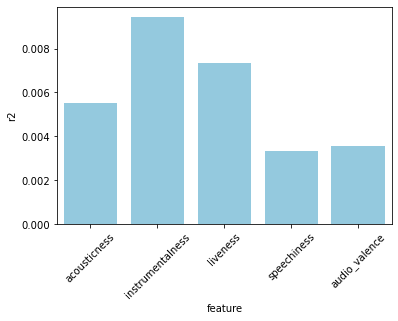

In [22]:
r2_features = []
RMSE_features = []
coef_features = []
features = predictors
for feature in predictors:
    x = df[[feature, 'audio_mode', 'time_signature', 'key']]
    x = pd.get_dummies(x, columns=['key', 'audio_mode', 'time_signature'], drop_first=True)
    y = df['song_popularity']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13242398)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    r2_features.append(r2_score(y_test, y_hat))
    RMSE_features.append(mean_squared_error(y_test, y_hat))
    coef_features.append(model.coef_[0])
    
sns.barplot(data=pd.DataFrame({'feature': predictors, 'r2': r2_features, }), x='feature', y='r2', color='skyblue')
plt.xticks(rotation=45)
plt.show()

## Linear Regression with All Features

In [23]:
predictors = np.append(predictors, ['audio_mode', 'time_signature', 'key'])
predictors
x = df[predictors]
y = df['song_popularity']
x = pd.get_dummies(x, columns=['key', 'audio_mode', 'time_signature'], drop_first=True)
x

,acousticness,instrumentalness,liveness,speechiness,audio_valence,key_1,key_2,key_3,key_4,key_5,...,key_7,key_8,key_9,key_10,key_11,audio_mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.00552,0.000029,0.0697,0.0308,0.474,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0.01030,0.000000,0.1080,0.0498,0.370,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.00817,0.404700,0.2550,0.0792,0.324,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0.02640,0.003550,0.1020,0.1070,0.198,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.00258,0.000000,0.1130,0.0313,0.574,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,0.78800,0.000065,0.1110,0.0348,0.300,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
18831,0.76500,0.000001,0.1050,0.0308,0.265,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
18832,0.78800,0.000000,0.1250,0.0355,0.286,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
18833,0.78800,0.015700,0.1190,0.0328,0.323,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13242398)

## Multiple Linear Regression

In [25]:
model = LinearRegression()
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
r2_linear_reg = r2_score(y_test, y_hat)
RMSE_linear_reg = mean_squared_error(y_test, y_hat)
print(r2_linear_reg, RMSE_linear_reg)

0.0169886916852936 288.6431567011586


In [26]:
print("R2:", r2_linear_reg)
print("RMSE:", RMSE_linear_reg)

R2: 0.0169886916852936
RMSE: 288.6431567011586


In [27]:
residuals = y_test - y_hat

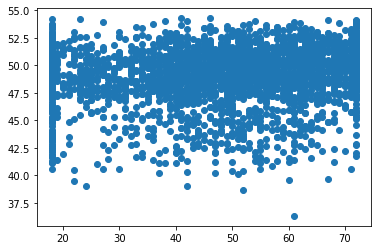

In [28]:
plt.scatter(y_test, y_hat)

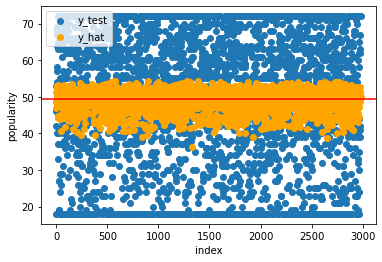

In [29]:
plt.scatter(np.arange(0, 2979, 1), y_test, label='y_test')
plt.scatter(np.arange(0, 2979), y_hat, color='orange', label='y_hat')
plt.axhline(np.mean(y_test), color='red')
plt.xlabel('index')
plt.ylabel('popularity')
plt.legend(loc='upper left')

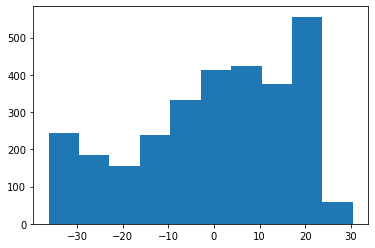

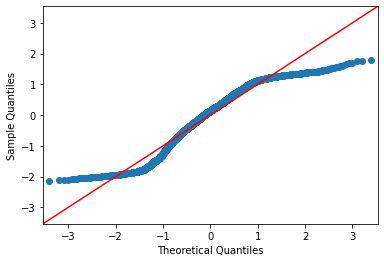

In [30]:
plt.hist(residuals)
plt.show()

sm.qqplot(residuals, line ='45', fit = True)
plt.show()

In [31]:
x_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        song_popularity   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     13.06
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           2.03e-45
Time:                        17:47:12   Log-Likelihood:                -50707.
No. Observations:               11915   AIC:                         1.015e+05
Df Residuals:                   11893   BIC:                         1.016e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               41.1645     12.117  

## Ridge Regression

In [32]:
model = Ridge()
grid_values = {'alpha':[1, 5, 10, 30, 50, 100, 115, 120, 150, 200, 300, 500]}
ridge = GridSearchCV(Ridge(), param_grid=grid_values)
ridge.fit(x_train, y_train)

y_hat= ridge.predict(x_test)
RMSE_ridge = mean_squared_error(y_test, y_hat)
r2_ridge = r2_score(y_test,y_hat)

alpha_ridge= ridge.best_params_['alpha']
beta_ridge = ridge.best_estimator_.coef_

beta_df = pd.DataFrame(beta_ridge)
beta_df.index = x.columns
beta_df.columns = ["Betas"]


print("R2:", r2_ridge)
print("Best Alpha:", alpha_ridge)
print("RMSE:", RMSE_ridge)

R2: 0.017646370417430668
Best Alpha: 10
RMSE: 288.4500414605367


## Lasso Regression

In [33]:
warnings.filterwarnings("ignore")

model = Lasso()
grid_values = {'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.75, 1, 5]}
lasso = GridSearchCV(model, param_grid=grid_values)
lasso.fit(x_train, y_train)

y_hat = lasso.predict(x_test)
r2_lasso = r2_score(y_test,y_hat)
RMSE_lasso = mean_squared_error(y_test, y_hat)

alpha_lasso = lasso.best_params_['alpha']


beta_lasso = lasso.best_estimator_.coef_
beta_df = pd.DataFrame(beta_lasso)
beta_df.index = x.columns
beta_df.columns = ["Betas"]

print("R2:", r2_lasso)
print("Best Alpha:", alpha_lasso)
print("RMSE:", RMSE_lasso)

R2: 0.017014131918163367
Best Alpha: 0.01
RMSE: 288.6356866455645


## Logistic Regression

In [34]:
med = df['song_popularity'].median()
# high/low popularity encoding
y = df['song_popularity'].apply(lambda x: 1 if x >= med else 0).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13242398)

R2: -0.7308681541582149
RMSE: 0.4326955354145686
AUC: 0.5666369168356998


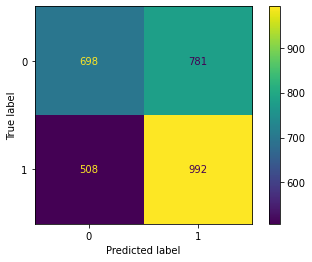

In [35]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train )
y_hat = log_reg.predict(x_test)
r2_log_reg = r2_score(y_test, y_hat)
RMSE_log_reg = mean_squared_error(y_test, y_hat)
AUC = roc_auc_score(y_test, y_hat)

beta_log_reg = log_reg.coef_
beta_df = pd.DataFrame(beta_log_reg.reshape(21,1))
beta_df.index = x.columns
beta_df.columns=["Betas"]

print("R2:", r2_log_reg)
print("RMSE:", RMSE_log_reg)
print("AUC:", AUC)

cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()

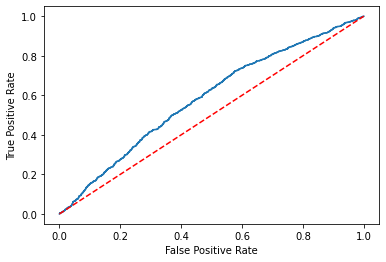

In [36]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), '--', color='red')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Classification
## XGBoost

In [37]:
X = df.drop(['song_name','song_popularity'],axis=1)
X

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,262333.0,0.00552,0.496,0.682,0.000029,8,0.0697,-4.0950,1,0.0308,162.0574,4,0.474
1,216933.0,0.01030,0.542,0.853,0.000000,3,0.1080,-6.4070,0,0.0498,105.2560,4,0.370
2,231733.0,0.00817,0.737,0.463,0.404700,0,0.2550,-7.8280,1,0.0792,123.8810,4,0.324
3,216933.0,0.02640,0.451,0.908,0.003550,0,0.1020,-4.9380,1,0.1070,122.4440,4,0.198
4,223826.0,0.00258,0.447,0.766,0.000000,10,0.1130,-5.0650,1,0.0313,162.0574,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,159645.0,0.78800,0.500,0.319,0.000065,11,0.1110,-12.6111,1,0.0348,113.9690,4,0.300
18831,205666.0,0.76500,0.495,0.319,0.000001,11,0.1050,-12.6111,0,0.0308,94.2860,4,0.265
18832,182211.0,0.78800,0.719,0.325,0.000000,0,0.1250,-12.2220,1,0.0355,130.5340,4,0.286
18833,285950.9,0.78800,0.488,0.326,0.015700,3,0.1190,-12.0200,1,0.0328,106.0630,4,0.323


In [38]:
def split(i):
    if i < df['song_popularity'].median():
        return 0
    else:
        return 1
y = df['song_popularity'].apply(split)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13242398)

In [40]:
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_auc_score, roc_curve, classification_report
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

In [41]:
parameters = {'objective':['binary:logistic'],
              'learning_rate': [0.05], 
              'max_depth': [6,8],
              'min_child_weight': [1,4,11],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [50,100],
              'seed': [13242398]}

In [42]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=-1,cv=3, scoring='accuracy').fit(X_train,y_train)

In [43]:
print(classification_report(clf.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74      5041
           1       0.83      0.73      0.78      6874

    accuracy                           0.76     11915
   macro avg       0.76      0.76      0.76     11915
weighted avg       0.77      0.76      0.76     11915



In [44]:
print(classification_report(clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56      1267
           1       0.67      0.58      0.62      1712

    accuracy                           0.59      2979
   macro avg       0.59      0.60      0.59      2979
weighted avg       0.60      0.59      0.60      2979



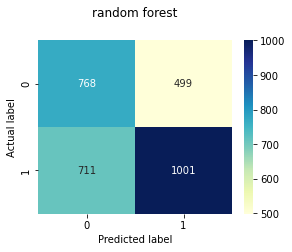

In [45]:
cnf_matrix = confusion_matrix(clf.predict(X_test),y_test)
plt.figure(figsize=(4,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout() 
plt.title('random forest', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')
plt.show()

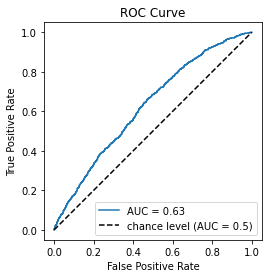

In [46]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr,label='AUC = '+str(np.round(roc_auc_score(y_test,y_pred_proba),2)))
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## KMeans

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_transformed = pca.fit_transform(X)

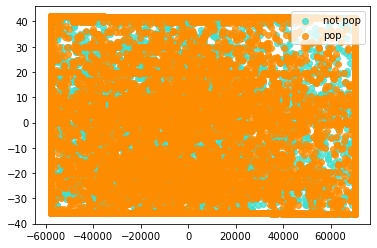

In [48]:
plt.figure()
for color, i, names in zip(['turquoise', 'darkorange'], [0, 1], ['not pop', 'pop']):
    plt.scatter(X_transformed[y==i, 0], X_transformed[y==i, 1], alpha = 0.8, color = color, label = names)
plt.legend()
plt.show()

In [49]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import pairwise_distances_argmin
def KMeans(X, n_clusters, rseed=13242398):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
#     print(i.shape)
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

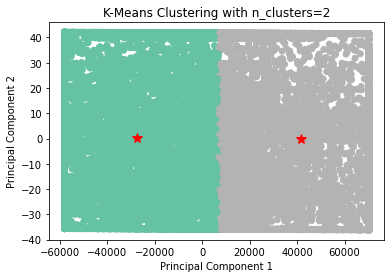

In [50]:
plt.figure()
centers, labels = KMeans(X_transformed, 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='Set2')
plt.plot(centers[:, 0], centers[:, 1], '*', markersize = 10, color='red')
plt.title('K-Means Clustering with n_clusters={}'.format(2))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()    